# 1. 如何统计收益率？

## 目录
1. 怎么计算累积收益率？
2. 如何计算收益率的均值与方差？
3. 如何用图显示收益分布？
4. 异常值和箱形图。
5. 随机变量。
6. 常见的分布类型。

## 1.怎么计算累积收益率？

#### 为什么是收益率？

最初的时候人们假设一个资产价格涨1元的概率和跌1元的概率是相等的，就好比扔硬币的正面反面一样。但很快人们就意识到这样做的问题。比如一个资产的价格是0.5元，显然他可能涨到1.5元但不可能跌到-0.5元（0元以下）。为了避免这个问题，人们重新假设资产涨1%的概率和跌1%的概率是相等的。


#### 计算收益率

一般人们会取的收盘价用于计算收益率，用P代表当日收盘价，如下：

一天收益率 = $\frac {P_t-P_{t-1}}{P_t}$

五天收益率 = $\frac {P_t-P_{t-5}}{P_t}$

十天收益率 = $\frac {P_t-P_{t-10}}{P_t}$

累积收益率 = $cumprod (1+r_n)$

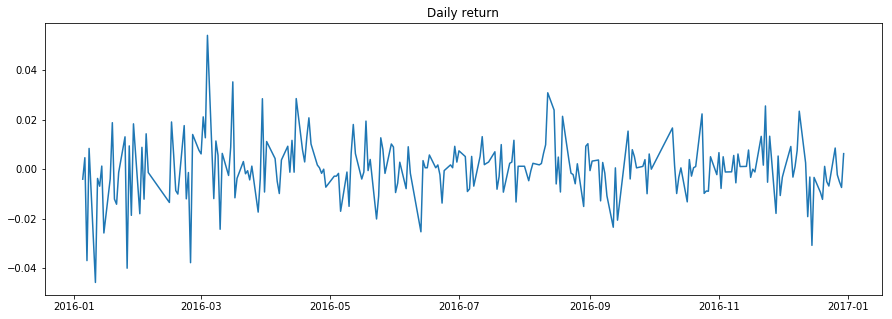

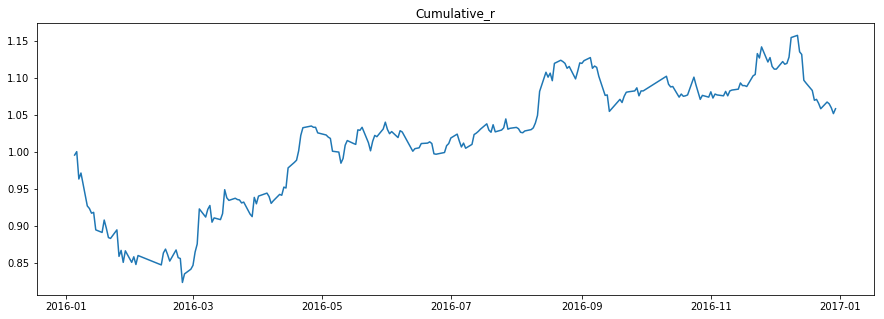

In [67]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import tushare as ts

stock = ts.get_k_data('600036', start='2016-01-01', end='2016-12-31', 
                      ktype='D', autype='qfq')

stock.index = pd.to_datetime(stock['date'], format='%Y-%m-%d')
stock.pop('date')
# stock = pd.DataFrame(stock, dtype=np.float64)

returns = stock.close.pct_change()[1:]  # pct_change 快速帮助获得百分比收益
plt.figure(figsize=(15, 5))
plt.plot(returns)
plt.title('Daily return')
plt.show()

r_add1 = returns+1
cumulative_r = r_add1.cumprod()   # 快速获得累积收益
plt.figure(figsize=(15, 5))
plt.plot(cumulative_r)
plt.title('Cumulative_r')
plt.show()

## 2.如何计算收益率的均值与方差？
**均值计算：**

|类型|描述|例子|结果|
|:--:| :--:| :-----------: |:-----:|
|算术均值 Arithmetic Mean|数据的和除以数据的数量|(1+2+2+3+4+7+9) / 7|4|
|中值 Median|中间值 |1, 2, 2, 3, 4, 7, 9|3|
|          |如果有两个一般取平均|1, 2, 3, 4, 7, 9|3.5|
|众数 Mode|出现次数最多的数字|1, 2, 2, 3, 4, 7, 9|2|

**方差与标准差：**

各数据偏离平均数的距离（离均差）一般用方差衡量，其无偏估计量为：

$\sigma^2=\frac{1}{n-1}\sum^n_{i=1}(x_i-\bar{x})^2$

$\sigma=\sqrt{\frac{1}{n-1}\sum^n_{i=1}(x_i-\bar{x})^2}$

其中 $\bar{x}$ 代表 $x$ 的平均数， 注意是 $n-1$ 而不是 $n$ 。

In [29]:
r = returns.dropna()

mean = r.mean()
median = r.median()
mode = r.mode()
var = r.var()
std = r.std()

print('mean', mean)
print('median', median)
print('mode', mode)
print('var', var)
print('std', std)

mean 0.0003078467316976011
median 0.0005750431282345314
mode 0    0.0
dtype: float64
var 0.0001471318400737501
std 0.012129791427462802


## 3.如何用图显示收益分布？

直方图（histPlot）可以帮助我们直观的发现分布规律

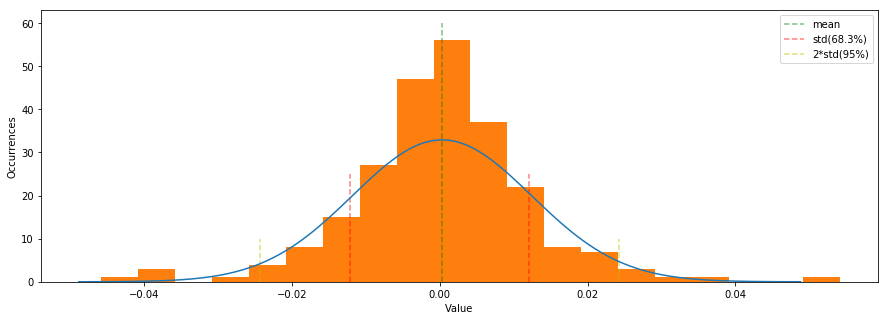

In [30]:
from scipy import stats

x = np.linspace(-(mean + 4*std),
                (mean + 4*std), len(returns))

y = stats.norm.pdf(x, mean, std)

fig = plt.figure(figsize=(15, 5))
plt.plot(x, y)
plt.hist(returns[1:], bins = 20)
plt.xlabel('Value')
plt.ylabel('Occurrences')
plt.vlines(mean, 0, 60, linestyles='dashed'
           , alpha=0.5, color='g', label='mean')
plt.vlines([std, -std],  0, 25, linestyles='dashed'
           , alpha=0.5, color='r', label='std(68.3%)')
plt.vlines([2*std, -2*std], 0, 10, linestyles='dashed'
           , alpha=0.5, color='y', label='2*std(95%)')
plt.legend()
plt.show()

### 如何计算百分位？
百分位数 Percentile：如第五百分位，它表示在所有测量数据中，测量值的累计频次达5%。以回报率为例，回报率分布的第五百分位表示有5%的回报率小于此测量值，95%的回报率大于此测量值。

-0.018601200800533735
0.01941567989610419


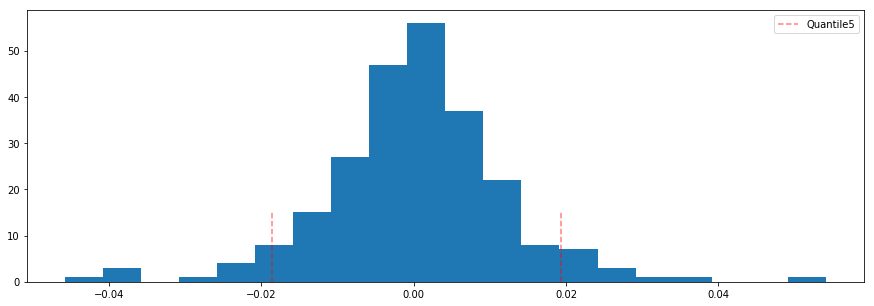

In [33]:
print(returns.quantile(0.05))
print(returns.quantile(0.95))

def HistPlot(data):
    fig = plt.figure(figsize=(15, 5))
    plt.hist(data[1:], bins = 20)
    plt.vlines([data.quantile(0.05), data.quantile(0.95)], 0, 15, linestyles='dashed'
               , alpha=0.5, color='r', label='Quantile5')
    plt.legend()
    plt.show()
    
HistPlot(returns)

## 4. 异常值处理：箱形图，缩尾和截尾

真实数据存在异常值，比如黑色星期五。如果你的目的不是研究黑色星期五而是研究一个更加普遍的规律，那么发现并处理这些异常值就是很值得去做的事情。

箱形图是一种描述数据的方式，箱形图有5个参数： 

下边缘（Q1），表示最小值； 

下四分位数（Q2），又称“第一四分位数”，等于该样本中所有数值由小到大排列后第25%的数字； 

中位数（Q3），又称“第二四分位数”等于该样本中所有数值由小到大排列后第50%的数字； 

上四分位数（Q4），又称“第三四分位数”等于该样本中所有数值由小到大排列后第75%的数字； 

上边缘（Q5），表述最大值。 

箱形图的上边缘和下边缘是理论最大最小值而不是实际上的最大最小值，其计算方式是：

上边缘：Q3 + 1.5*（Q4-Q2）

下边缘：Q2 - 1.5*（Q4-Q2）

超出上下边缘的数，箱形图标记其为‘异常值’，用圈圈表示。

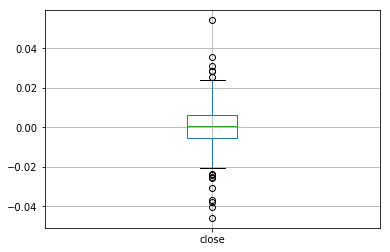

In [17]:
pd.DataFrame(returns).boxplot()
plt.show()

缩尾：缩尾是指是将尾部数据统一调整为同一个值，比如把超过最大1%的数值调整为1%分位数的值。

进一步的，你可以只对过大的异常值缩尾而不处理过小的异常值（右缩），只对过小的异常值缩尾而不处理过大的异常值（左缩），同时对过大的异常值和过小的异常值进行处理（双缩）。

当然另一种办法就是直接抛弃这些数据，这种做法被称为截尾

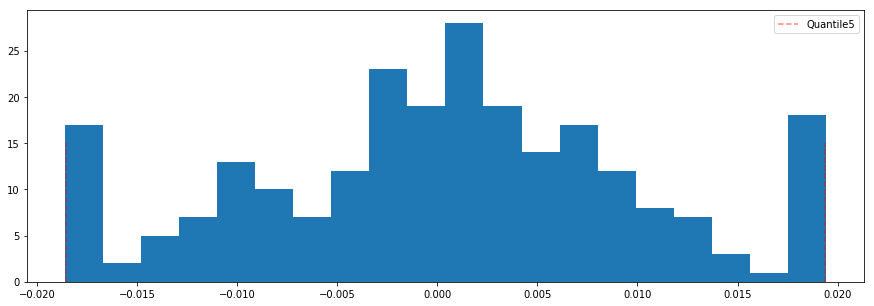

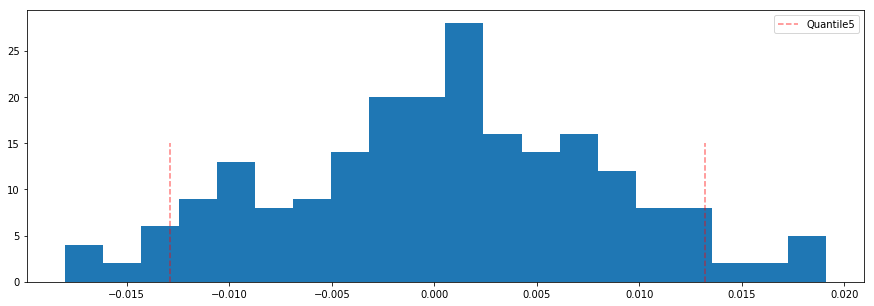

In [99]:
## 缩尾：
r_tail = returns.copy()
r_tail[r_tail>returns.quantile(0.95)] = returns.quantile(0.95)
r_tail[r_tail<returns.quantile(0.05)] = returns.quantile(0.05)
HistPlot(r_tail)

## 截尾：
r_cut = returns.copy()
r_cut=r_cut[r_cut<returns.quantile(0.95)]
r_cut=r_cut[r_cut>returns.quantile(0.05)]
HistPlot(r_cut)

## 5. 随机变量

###  离散随机变量（Discrete Random Variables） 

摇一颗骰子100次，k次摇到6，k是随机变量，k的取值是自然数0，1，2，…，100是不连续的。

### 连续随机变量（Continuous Random Variables） 

比如，公共汽车每15分钟一班，有100个人在站台等车时间x是个随机变量，x的取值范围是[0,15]，它是一个区间，从理论上x可以等于这个区间内任意一个数。

python numpy包可以用于生成随机变量，导入random模块如下

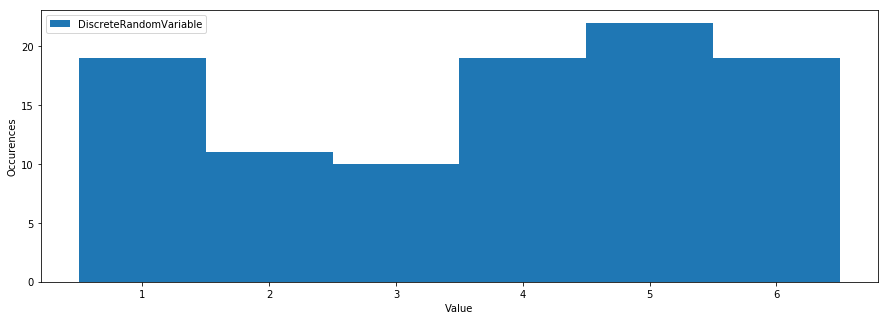

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# randint 产生随机整数
DiscreteRandomVariable = np.random.randint(1, 7, 100)
fig = plt.figure(figsize=(15, 5))
plt.hist(DiscreteRandomVariable , bins = [1,2,3,4,5,6,7], align='left')
plt.xlabel('Value')
plt.ylabel('Occurences')
plt.legend(['DiscreteRandomVariable'])
plt.show()

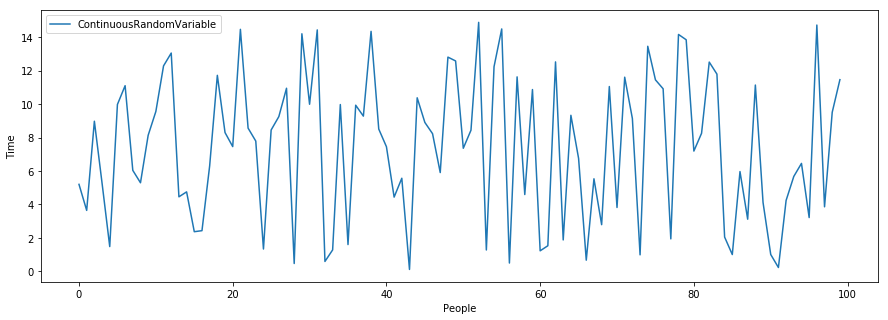

In [45]:
# random.uniform生成均匀分布
CRV = np.random.uniform(0, 15, 100)
fig = plt.figure(figsize=(15, 5))
plt.plot(CRV)
plt.xlabel('People')
plt.ylabel('Time')
plt.legend(['ContinuousRandomVariable'])
plt.show()

## 6. 一些常见的分布

### 二项分布(Binomial Distribution) 
投一个硬币，0.5概率向上，投了5次，重复50轮，平均每轮硬币正面朝上的次数时多少？

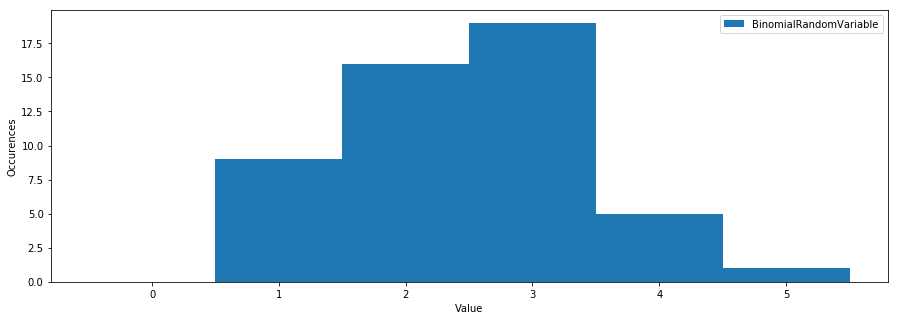

In [60]:
#二项分布(Binomial Distribution) 
BinomialRandomVariable = np.random.binomial(5,0.50,50)

fig = plt.figure(figsize=(15, 5))
plt.hist(BinomialRandomVariable, bins = [0, 1, 2, 3, 4, 5, 6],align='left')
plt.xlabel('Value')
plt.ylabel('Occurences')
plt.legend(['BinomialRandomVariable'])
plt.show()

###  正态分布（Normal Distribution） 
正态分布有两个关键参数，均值和方差，方差约大，正态分布越扁平。
均值为0，方差为1的正态分布被称为标准正态分布。任何正态分布都可以通过‘减去均值除以标准差’的方式标准化成标准正态分布

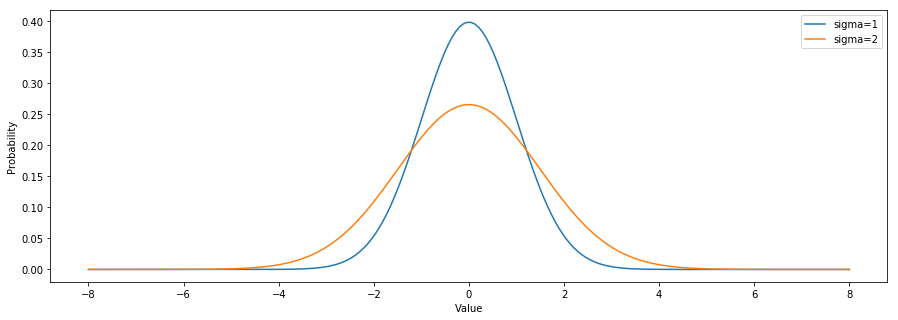

In [69]:
#正态分布（Normal Distribution） 
from scipy import stats

mu_1 = 0
mu_2 = 0
sigma_1 = 1
sigma_2 = 1.5
x = np.linspace(-8, 8, 200)
y = stats.norm.pdf(x,mu_1,sigma_1)
z = stats.norm.pdf(x,mu_2,sigma_2)

fig = plt.figure(figsize=(15, 5))
plt.plot(x, y, label='sigma=1')
plt.plot(x, z, label='sigma=2')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.legend()
plt.show()

正态分布有两个参数，第一个是均值，决定正态分布‘峰’的位置，第二个是标准差，决定正态分布‘峰’的高低，对比上图，sigma越小的正态分布越‘尖峰’。

正态分布的组合可以诞生出许多分布，比如下图两个表示两个正态分布的‘和’。

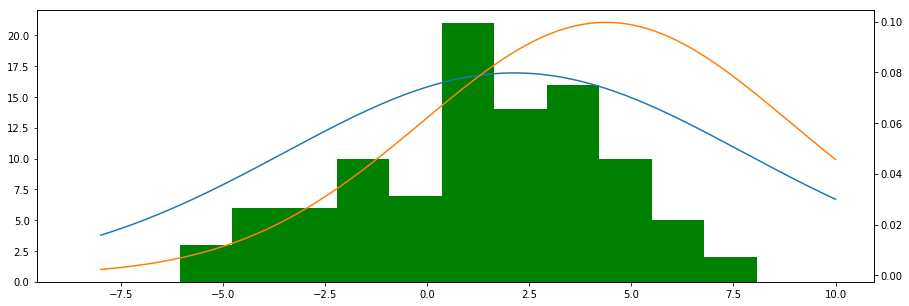

In [97]:
np.random.seed(7)
x = (np.random.normal(1,5,100) + np.random.normal(3,4,100))/2
y = stats.norm.pdf(np.linspace(-8, 10, 200),1,5)
z = stats.norm.pdf(np.linspace(-8, 10, 200),3,4)
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(111)
ax1.hist(x, bins =np.linspace(-8, 10, 15),align='left',facecolor='g')
ax2 = ax1.twinx()
y = stats.norm.pdf(np.linspace(-8, 8, 200),1,5)
z = stats.norm.pdf(np.linspace(-8, 8, 200),3,4)
ax2.plot(np.linspace(-8, 10, 200), y)
ax2.plot(np.linspace(-8, 10, 200), z)
plt.show()

### t分布 （T-Distribution）

t分布概率密度曲线以0为中心，左右对称的单峰分布；期形态变化与自由度大小有关，自由度越小，分布越散，而自由度与样本量和变量数量有关。当自由度为30时，t分布已经接近标准的正太分布曲线,当自由度为120时，等于正太分布。一般自由度为1-30,40,50,...,120。与标准的正态分布相比，t分布呈现‘尖峰厚尾’的特点，更符合金融数据形式。

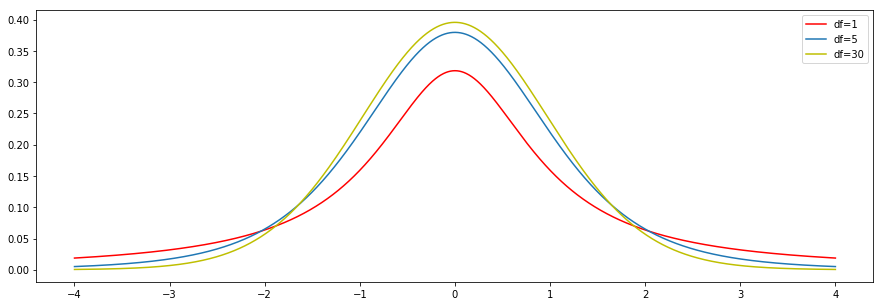

In [98]:
# t-分布
x = np.arange(-4,4.004,0.004)
fig = plt.figure(figsize=(15, 5))
plt.plot(x,stats.t.pdf(x, 1),'r', label='df=1')
plt.plot(x,stats.t.pdf(x, 5), label='df=5')
plt.plot(x,stats.t.pdf(x, 30),'y', label='df=30')
plt.legend()
plt.show()

可以看到，df=1的t分布尾部概率比df=5和30的t分布更‘厚’。